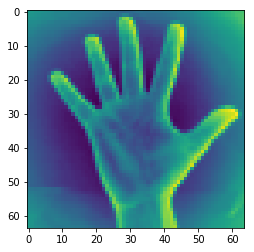

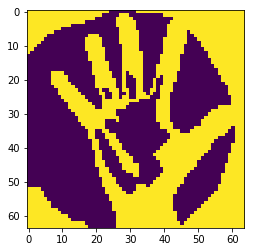

In [5]:
import os
import numpy as np
from scipy.misc import imread, imresize
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_mean
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

import pickle
from sklearn.externals import joblib


test_size = 0.2

img_size = 64
grayscale_images = True
num_class = 10

# Modified from the given code
def get_img(data_path):
    # Getting image array from path:
    img = imread(data_path, flatten=grayscale_images)
    img = imresize(img, (img_size, img_size, 1 if grayscale_images else 3))
    # thresh = threshold_mean(img)
    # binary = img > thresh
    return img

def get_dataset(dataset_path='dataset'):
    # Getting all data from data path:
    labels = os.listdir(dataset_path) # Geting labels
    X = []
    Y = []
    for i, label in enumerate(labels):
        datas_path = dataset_path+'/'+label
        for data in os.listdir(datas_path):
            img = get_img(datas_path+'/'+data)
            X.append(img)
            Y.append(i)
    # Create dateset:
    X = 1-np.array(X).astype('float32')/255.
    Y = np.array(Y).astype('float32')
    return X, Y

# Self written
X, Y = get_dataset("dataset")

plt.imshow(X[1120])
plt.show()

thresh = threshold_mean(X[1120])
binary = X[1120] > thresh
plt.imshow(binary)
plt.show()



In [11]:
import time

features = np.array(X).reshape((X.shape[0], 64 * 64))
labels = Y
print("Shape: " + str(features.shape))

clf = SVC(kernel="linear")


features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=test_size, random_state=15)

start = time.time()
clf.fit(features_train, labels_train)
print("Accuracy: " + str(clf.score(features_test, labels_test)))
end = time.time()
print("Time used: " + str(end - start) + "s")

# joblib.dump(clf, "linear-svm.pkl")


Shape: (2062, 4096)
Accuracy: 0.830508474576
Time used: 27.74316716194153s


In [18]:
pca = PCA(n_components=200, copy=True, whiten=True)
features_pca = pca.fit_transform(features)
recovered = pca.inverse_transform(features)

print("Shape: " + str(features.shape))

clf = SVC(kernel="linear")

features_train, features_test, labels_train, labels_test = train_test_split(features_pca, labels, test_size=test_size, random_state=15)

start = time.time()
clf.fit(features_train, labels_train)
print("Accuracy: " + str(clf.score(features_test, labels_test)))
end = time.time()
print("Time used: " + str(end - start) + "s")


Shape: (2062, 200)
Accuracy: 0.719128329298
Time used: 2.075303316116333s


In [24]:
X, Y = get_dataset("dataset")

features = np.array(X).reshape((X.shape[0], 64 * 64))
labels = Y

clf = SVC(kernel="linear")

clf.fit(features, labels)
# joblib.dump(clf, "linear-svm.pkl")

X_val, Y_val = get_dataset("validation")

features_val = np.array(X_val).reshape((X_val.shape[0], 64 * 64))
labels_val = Y_val

# result = clf.predict(features_val)
# for r, l in zip(result, labels):
#     print(str(r) + " " + str(l))

print("Accuracy: " + str(clf.score(features_val, labels_val)))

0.642857142857
